<a href="https://colab.research.google.com/github/cameronliddle/CAForecast/blob/main/CAFifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
fifa_df =pd.read_excel("fifa.xlsx", index_col=0)
print(fifa_df.head())


                           name   rating  position   height    foot   rare  \
id                                                                           
1001             GÃ¡bor KirÃ¡ly       69        GK      191   Right      0   
100143             Frederik Boi       65         M      184   Right      0   
100264          Tomasz Szewczuk       57         A      185   Right      0   
100325   Steeve Joseph-Reinette       63         D      180    Left      0   
100326             Kamel Chafni       72         M      181   Right      0   

        pace  shooting  passing  dribbling  defending  heading  diving  \
id                                                                       
1001                                                                70   
100143    61        65       63         59         62       62           
100264    65        54       43         53         55       74           
100325    68        38       51         46         64       71           
100326   

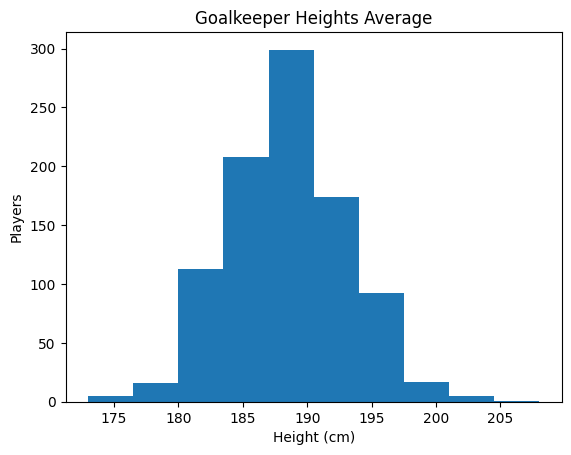

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("fifa.xlsx")

df_gk = df[df[' position'] == ' GK']

plt.hist(df_gk[' height'], bins=10)

plt.title("Goalkeeper Heights Average")
plt.xlabel("Height (cm)")
plt.ylabel("Players")

plt.show()


In [8]:
goalkeepers = fifa_df[fifa_df[' position'] == ' GK']
average_height = goalkeepers[' height'].mean()
print("The average height of a goalkeeper is:", average_height)


The average height of a goalkeeper is: 188.23333333333332


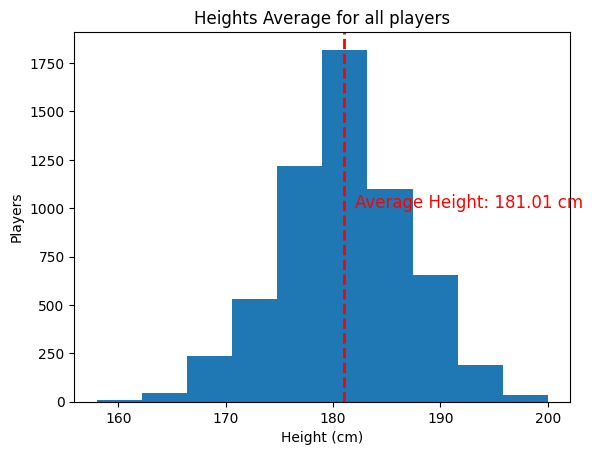

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("fifa.xlsx")

# Filter for midfielders, strikers, and defenders
df = df[df[' position'].isin([' M', ' S', ' D'])]

# Convert height to numeric values
df[' height'] = pd.to_numeric(df[' height'], errors='coerce')

# Calculate average height
avg_height = df[' height'].mean()

# Plot histogram of heights
plt.hist(df[' height'], bins=10)

plt.axvline(avg_height, color='red', linestyle='dashed', linewidth=2)
plt.text(avg_height + 1, 1000, f'Average Height: {round(avg_height, 2)} cm', fontsize=12, color='red')

plt.title("Heights Average for all players")
plt.xlabel("Height (cm)")
plt.ylabel("Players")

plt.show()


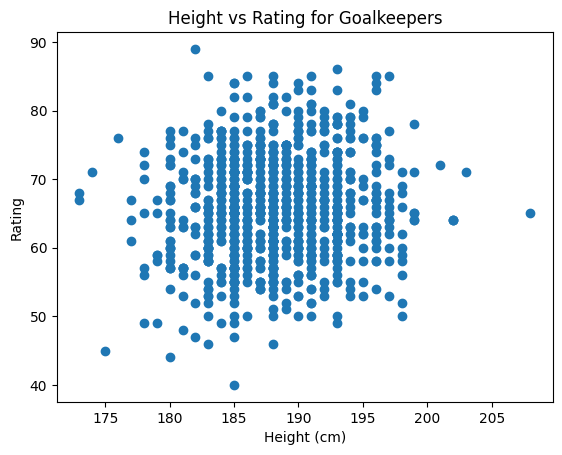

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("fifa.xlsx")

# Subset of data for only goalkeepers
df_gk = df[df[' position'] == ' GK']

# Create scatter plot of height vs rating for goalkeepers
plt.scatter(df_gk[' height'], df_gk[' rating'])
plt.title('Height vs Rating for Goalkeepers')
plt.xlabel('Height (cm)')
plt.ylabel('Rating')
plt.show()


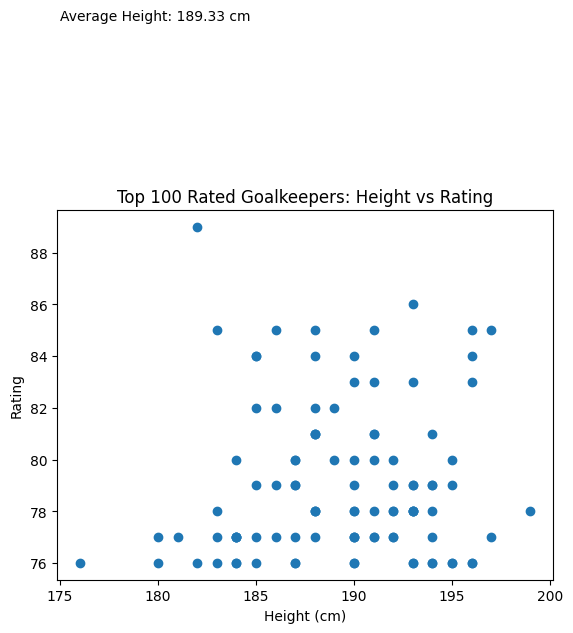

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("fifa.xlsx")

df_gk = df[df[' position'] == ' GK']

df_top_gk = df_gk.sort_values(' rating', ascending=False).head(100)

avg_height = df_top_gk[' height'].mean()

plt.scatter(df_top_gk[' height'], df_top_gk[' rating'])

plt.title("Top 100 Rated Goalkeepers: Height vs Rating")
plt.xlabel("Height (cm)")
plt.ylabel("Rating")
plt.text(175, 97, f"Average Height: {round(avg_height, 2)} cm")

# Display the plot
plt.show()



In [15]:
attributes = fifa_df[fifa_df[' position']== ' A']
attributes
average_value_A = attributes.mean()
avg_value_round_A = round (average_value_A, 1)
avg_value_round_A

<ipython-input-15-223bbbf3be65>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_value_A = attributes.mean()


 rating          67.3
 height         180.9
 rare             0.5
 pace            72.5
 shooting        63.8
 passing         54.4
 dribbling       66.7
 defending       50.9
 heading         64.8
 positioning      NaN
dtype: float64

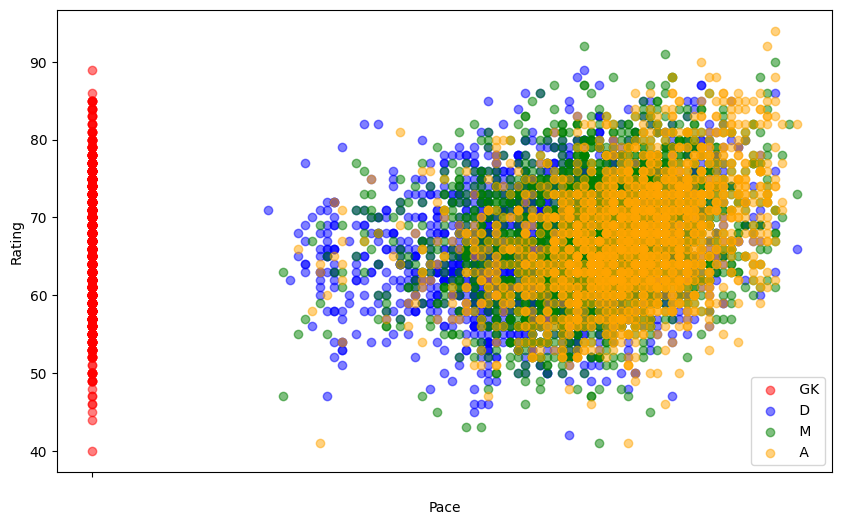

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("fifa.xlsx")

pace_rating_position_df = df[[' pace', ' rating', ' position']]

position_colors = {' GK': 'red', ' D': 'blue', ' M': 'green', ' A': 'orange'}

fig, ax = plt.subplots(figsize=(10, 6))

for position, color in position_colors.items():
    data = pace_rating_position_df[pace_rating_position_df[' position'] == position]
    ax.scatter(data[' pace'], data[' rating'], c=color, label=position, alpha=0.5)

ax.set_xlabel('Pace')
ax.set_ylabel('Rating')
ax.legend()

# Show the plot
plt.show()


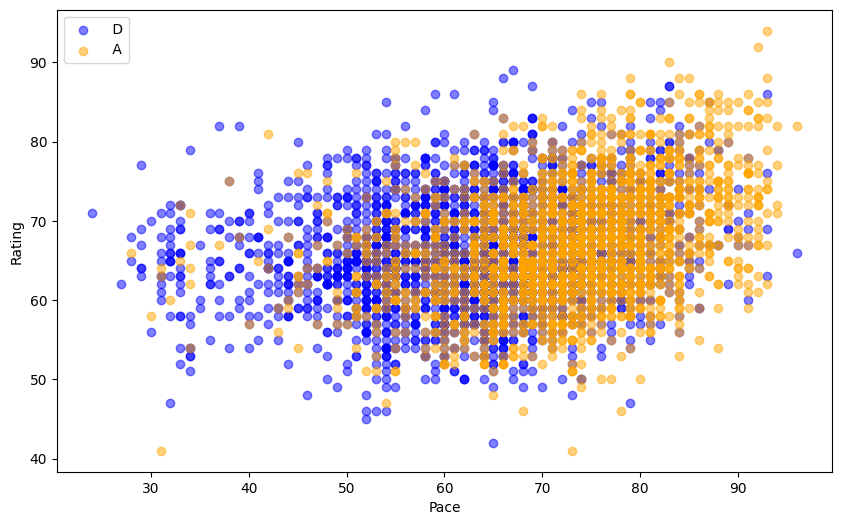

Top 10 Highest-Rated Defenders and Their Pace Ratings:

                   name   rating  pace
1199     Nemanja VidiÄ‡       89    67
1782             PiquÃ©       88    66
513        Philipp Lahm       87    83
2724       Thiago Silva       87    83
8765      Rio Ferdinand       87    69
590               Puyol       86    59
799          John Terry       86    61
1375         Dani Alves       86    93
176              LÃºcio       85    76
194    Alessandro Nesta       85    54

Top 10 Highest-Rated Attackers and Their Pace Ratings:

                      name   rating  pace
2195          Lionel Messi       94    93
7943     Cristiano Ronaldo       92    92
8697          Wayne Rooney       90    83
349            David Villa       88    85
1267         Carlos TÃ©vez       88    84
8138   Zlatan IbrahimoviÄ‡       88    79
8836          Samuel Eto'o       88    93
482      Antonio Di Natale       86    86
1637           Mario Gomez       86    79
1846        Sergio AgÃ¼ero       86   

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("fifa.xlsx")

defender_attackers_df = df.loc[df[' position'].isin([' D', ' A'])]

pace_rating_position_df = defender_attackers_df[[' pace', ' rating', ' position']]

position_colors = {' D': 'blue', ' A': 'orange'}

fig, ax = plt.subplots(figsize=(10, 6))

for position, color in position_colors.items():
    data = pace_rating_position_df[pace_rating_position_df[' position'] == position]
    ax.scatter(data[' pace'], data[' rating'], c=color, label=position, alpha=0.5)

ax.set_xlabel('Pace')
ax.set_ylabel('Rating')
ax.legend()

plt.show()

top_defenders = defender_attackers_df[defender_attackers_df[' position'] == ' D'].nlargest(10, ' rating')
top_attackers = defender_attackers_df[defender_attackers_df[' position'] == ' A'].nlargest(10, ' rating')

print("Top 10 Highest-Rated Defenders and Their Pace Ratings:\n")
print(top_defenders[[' name', ' rating', ' pace']])
print("\nTop 10 Highest-Rated Attackers and Their Pace Ratings:\n")
print(top_attackers[[' name', ' rating', ' pace']])
